# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Wall time: 1.45 s
Train ROC-AUC 0.9895
Valid ROC-AUC 0.9103
Test ROC-AUC 0.9104


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [7]:
results = {}

depths = range(1, 30, 2)

for d in depths:
    dep_boosting = Boosting(base_model_params = {'max_depth':d})
    dep_boosting.fit(x_train, y_train, x_valid, y_valid)
    results[d] = [dep_boosting.score(x_train, y_train), dep_boosting.score(x_test, y_test)]

In [8]:
results

{1: [0.847773970295083, 0.8326706008127559],
 3: [0.937397722454739, 0.9187539264048066],
 5: [0.9562833243153499, 0.9288500022830224],
 7: [0.9676297518052905, 0.9330220288038694],
 9: [0.9750227546791075, 0.9325862864358558],
 11: [0.9787170751464451, 0.9325240937582168],
 13: [0.9827685658338726, 0.9264481053276294],
 15: [0.98522307180139, 0.9226417560063169],
 17: [0.986896697591388, 0.9283512799882857],
 19: [0.9874918944250397, 0.9224917850558081],
 21: [0.988732149462099, 0.9118450284433095],
 23: [0.9888605629648954, 0.9214104984388851],
 25: [0.9893751042553093, 0.9137297027504907],
 27: [0.989563114380369, 0.9074864238895458],
 29: [0.9891206040309083, 0.9108865526834959]}

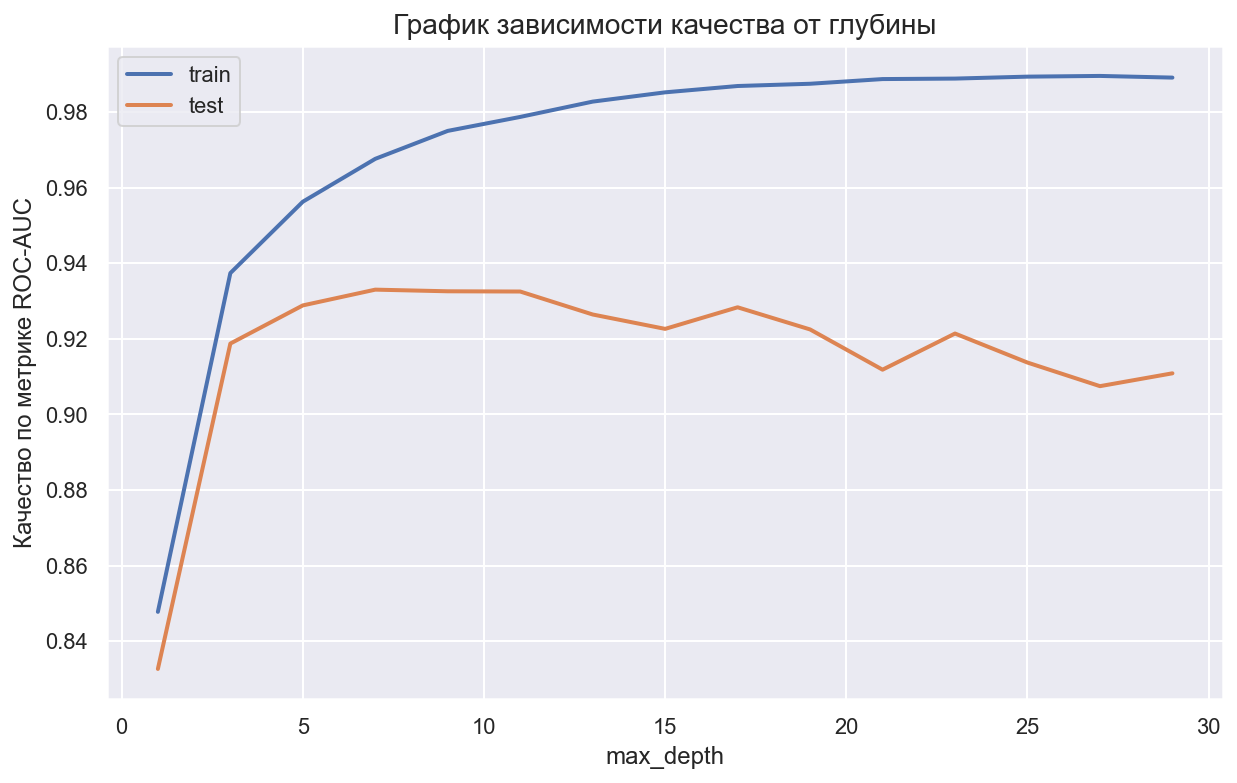

In [9]:
%config InlineBackend.figure_format = 'retina'
f = plt.figure(figsize=(10,6))
results_sorted = sorted(results.items())
x, y = zip(*results_sorted)
y1, y2 = zip(*y)
plt.plot(x, y1, linewidth=2, label='train')
plt.plot(x, y2, linewidth=2, label='test')
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Качество по метрике ROC-AUC', fontsize=12)
plt.title('График зависимости качества от глубины', fontsize=14)
plt.legend(loc='upper left')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество на тесте получилось для глубины 9. Вероятно, это можно объяснить тем, что начиная с этой глубины деревья становятся слишком глубокими и слишком подстраиваются под обучающую выборку, выдавая более низкое качество на тестовой, а деревья с меньшей глубиной недообучаются (неглубокие деревья плохо подстраиваются под выборку)

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [13]:
n_estimators_gr = range(5, 100, 10)
learning_rate_gr = np.linspace(0.05, 1, 10)
subsample_gr = np.linspace(0.05, 1, 10)
early_stopping_rounds_gr = [None] + list(range(1, 7))

max_depth_gr = range(3, 15)
min_samples_leaf_gr = range(3, 27)

In [14]:
def search_grid(param_grid, param):
    best_score = 0
    for p in param_grid:
        param_dict = {param:p}
        if param in ('max_depth', 'min_samples_leaf'):
            param_boost = Boosting(param_dict)
        else:
            param_boost = Boosting(**param_dict)
        param_boost.fit(x_train, y_train, x_valid, y_valid)
        cur_score = param_boost.score(x_valid, y_valid)
        if cur_score > best_score:
            best_score = cur_score
            best_params = p
        return best_params, best_score
            
top_n_estimators, bs1 = search_grid(n_estimators_gr, 'n_estimators')
top_learning_rate, bs2 = search_grid(learning_rate_gr, 'learning_rate')
top_subsample, bs3 = search_grid(subsample_gr, 'subsample')
top_early_stop, bs4 = search_grid(early_stopping_rounds_gr, 'early_stopping_rounds')
top_max_depth, bs5 = search_grid(max_depth_gr, 'max_depth')
top_min_sample, bs6 = search_grid(min_samples_leaf_gr, 'min_samples_leaf')

In [15]:
param_dict = {'n_estimators':top_n_estimators, 'learning_rate':top_learning_rate, 
              'subsample':top_subsample, 'early_stopping_rounds':top_early_stop
              }
base_model_param = {'max_depth':top_max_depth, 'min_samples_leaf':top_min_sample}
top_boost = Boosting(base_model_param, **param_dict)
top_boost.fit(x_train, y_train, x_valid, y_valid)

print(f'Test ROC-AUC {top_boost.score(x_test, y_test):.4f}')

Test ROC-AUC 0.9160


Ниже моя попытка сделать некоторый упрощенный аналог GridSearchCV (как я его понимаю) с помощью циклов и попытка использовать сам GridSearch для перебора, но оба варианта почему-то работают очень-очень долго (больше полутора часов работала следующая ячейка, так и не отработала), и очень плохо (выдают или какие-то странные наборы: из первых значений в сетке, например, либо вообще падают с ошибкой), может, подскажете, в чем моя ошибка тут?

In [ ]:
# best_score = 0
# best_params = {}
# for md in max_depth_gr:
#     for ms in min_samples_leaf_gr:
#         base_model_param = {'max_depth':md, 'min_samples_leaf':ms}
#         for n_estim in n_estimators_gr:
#             for lr in learning_rate_gr:
#                 for subsamp in subsample_gr:
#                     for early_stop in early_stopping_rounds_gr:
#                         param_dict = {'n_estimators':n_estim, 'learning_rate':lr, 
#                                       'subsample':subsamp, 'early_stopping_rounds':early_stop
#                                       }
#                         param_boost = Boosting(base_model_param, **param_dict)
#                         param_boost.fit(x_train, y_train, x_valid, y_valid)
#                         cur_score = param_boost.score(x_valid, y_valid)
#                         if cur_score > best_score:
#                             best_score = cur_score
#                             best_params = param_dict
#                             best_boost = param_boost
# print(best_score, best_params)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import PredefinedSplit
# from sklearn.metrics import make_scorer

# n_estimators_gr = np.arange(7, 15)
# learning_rate_gr = np.linspace(0.1, 0.8, 5)
# subsample_gr = np.linspace(0.2, 0.6, 5)
# early_stopping_rounds_gr = [None, 1, 2] #np.arange(2, 5)

# max_depth_gr = np.arange(3, 11, 2)
# min_samples_leaf_gr = np.arange(3, 11)
# base_model_params_gr = []
# for md in max_depth_gr:
#     for ms in min_samples_leaf_gr:
#         base_model_params_gr.append({'max_depth':md, 'min_samples_leaf':ms})

# # x_train_val = np.vstack((x_train.toarray(), x_valid.toarray()))
# # y_train_val = np.hstack((y_train, y_valid))
# # split_index = [-1 if i in range(x_train.shape[0]) else 0 for i in range(x_train_val.shape[0])]
# # pd = PredefinedSplit(test_fold = split_index)

# param_grid = {'n_estimators':n_estimators_gr, 'learning_rate':learning_rate_gr, 'subsample':subsample_gr, 
#               'early_stopping_rounds':early_stopping_rounds_gr, 'base_model_params':base_model_params_gr}

# est_mod = Boosting()
# #score = est_mod.score()

# def my_score(clf, X, y_true):
#     return clf.score(clf, X, y_true)

# gcv_scorer = make_scorer(my_score)

# searcher = GridSearchCV(est_mod, param_grid=param_grid, scoring=gcv_scorer, cv=10) #cv=pd)
# #searcher.fit(x_train_val, y_train_val, x_valid = x_valid, y_valid = y_valid)
# searcher.fit(x_valid, y_valid, x_valid = x_test, y_valid = y_test)

# print("Best params: {}".format(searcher.best_params_))
# print("Best score: {}".format(searcher.best_score_))

## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [17]:
#!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

#xgb_model = xgb.XGBRegressor()
xgb_model = xgb.XGBClassifier(nthread=4, seed=42)

x_train_test = np.vstack((x_train.toarray(), x_test.toarray()))
y_train_test = np.hstack((y_train, y_test))
split_index1 = [-1 if i in range(x_train.shape[0]) else 0 for i in range(x_train_test.shape[0])]
pd1 = PredefinedSplit(test_fold = split_index1)

param_grid1 = {
    'n_estimators': [10, 20, 50],
    'learning_rate': [0.05, 0.15, 0.3],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'max_depth': [4, 7, 10],
    'reg_lambda': [0.5, 1.0, 1.2],
    'reg_alpha': [0.5, 1.0, 1.2],
    'subsample': [0.3, 0.5, 0.7]
}

clf = GridSearchCV(xgb_model, param_grid=param_grid1, scoring='roc_auc', cv=pd1, n_jobs=-1)
clf.fit(x_train_test, y_train_test)
print('Best params:', clf.best_params_)
print('Best score:', clf.best_score_)

[20:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 20, 'reg_alpha': 0.5, 'reg_lambda': 1.2, 'subsample': 0.3}
Best score: 0.941081884926227


У библиотечного xgboost качество получше (да, знаю, что не так много значений перебирается, но у меня даже это обучается как-то долго (полчаса)

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [18]:
#!pip install hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

def hyperopt_xgb_score(params):
    clf = xgb.XGBClassifier(**params)
    #current_score = cross_val_score(clf, x_train, y_train, cv=3).mean()
    #print(current_score, params)
    clf.fit(x_train, y_train)
    #pred = clf.predict(x_test)
    current_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    return -current_score
 
# simple_space_xgb = {
#             'n_estimators': hp.choice('n_estimators', range(100, 1000)),
#             'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
#             'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
# }

space_xgb2 = {
            'n_estimators': hp.choice('n_estimators', np.arange(10, 100, 30)),
            'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.25, 0.05)),
            'max_depth':  hp.choice('max_depth', np.arange(4, 7, dtype=int)),
            'subsample': hp.quniform('subsample', 0.3, 0.7, 0.2),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 0.7, 0.2),
            'reg_lambda': hp.choice('reg_lambda', np.arange(0.1, 0.3, 0.1)),
            'eval_metric': 'auc',
        }
 
best = fmin(fn=hyperopt_xgb_score, space=space_xgb2, max_evals=500) # algo=tpe.suggest,
print('Best params:')
print(best)

TPE is being used as the default algorithm.


100%|█████████████████████████████████████████████| 500/500 [05:11<00:00,  1.61trial/s, best loss: -0.9400454715070938]
Best params:
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 2, 'max_depth': 1, 'n_estimators': 2, 'reg_lambda': 1, 'subsample': 0.6000000000000001}


получилось что-то странное, хотя качество, вроде, лучше, чем у ручного перебора, но вывелись какие-то параметры, которых вообще в переборе быть не должно было, вроде

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

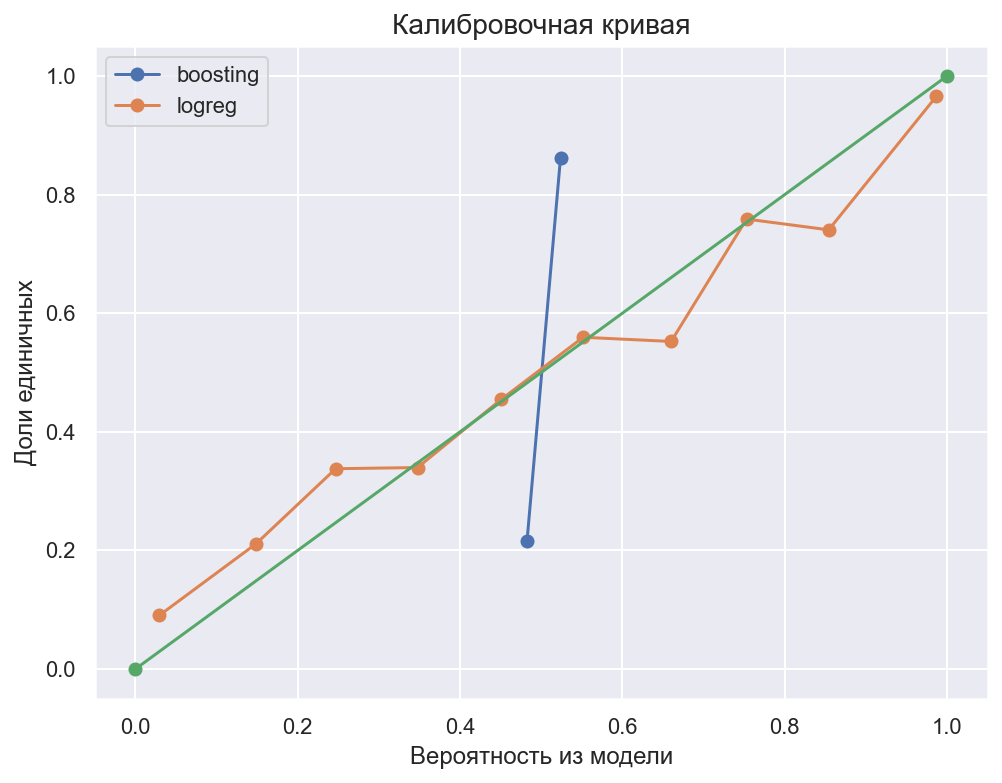

In [26]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'

prob_boost = top_boost.predict_proba(x_test)[:,1]
scaler = StandardScaler(with_mean=False) # чтобы честно оценить важность признаков далее
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train_sc, y_train)
prob_lr = lr.predict_proba(x_test_sc)[:,1]

prob_true_boost, prob_pred_boost = calibration_curve(y_test, prob_boost, n_bins=10)
prob_true_lr, prob_pred_lr = calibration_curve(y_test, prob_lr, n_bins=10)

plt.figure(figsize=(8,6))
plt.plot(prob_pred_boost, prob_true_boost, 'o-', label='boosting')
plt.plot(prob_pred_lr, prob_true_lr, 'o-', label='logreg')
plt.plot([0,1], [0,1], 'o-')
plt.xlabel('Вероятность из модели', fontsize=12)
plt.ylabel('Доли единичных', fontsize=12)
plt.title('Калибровочная кривая', fontsize=14)
plt.legend(loc='upper left')
plt.show()

В сравнении с логистической регрессией бустинг оценивает вероятности не очень хорошо, что, скорее всего, объясняется тем, что перед ним (в отличие от логрега) не стоит такой задачи (корректной оценки вероятностей)

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [27]:
f_imp_lr = list(abs(lr.coef_[0]) / np.linalg.norm(lr.coef_[0]))
f_imp_b = list(top_boost.feature_importances_)

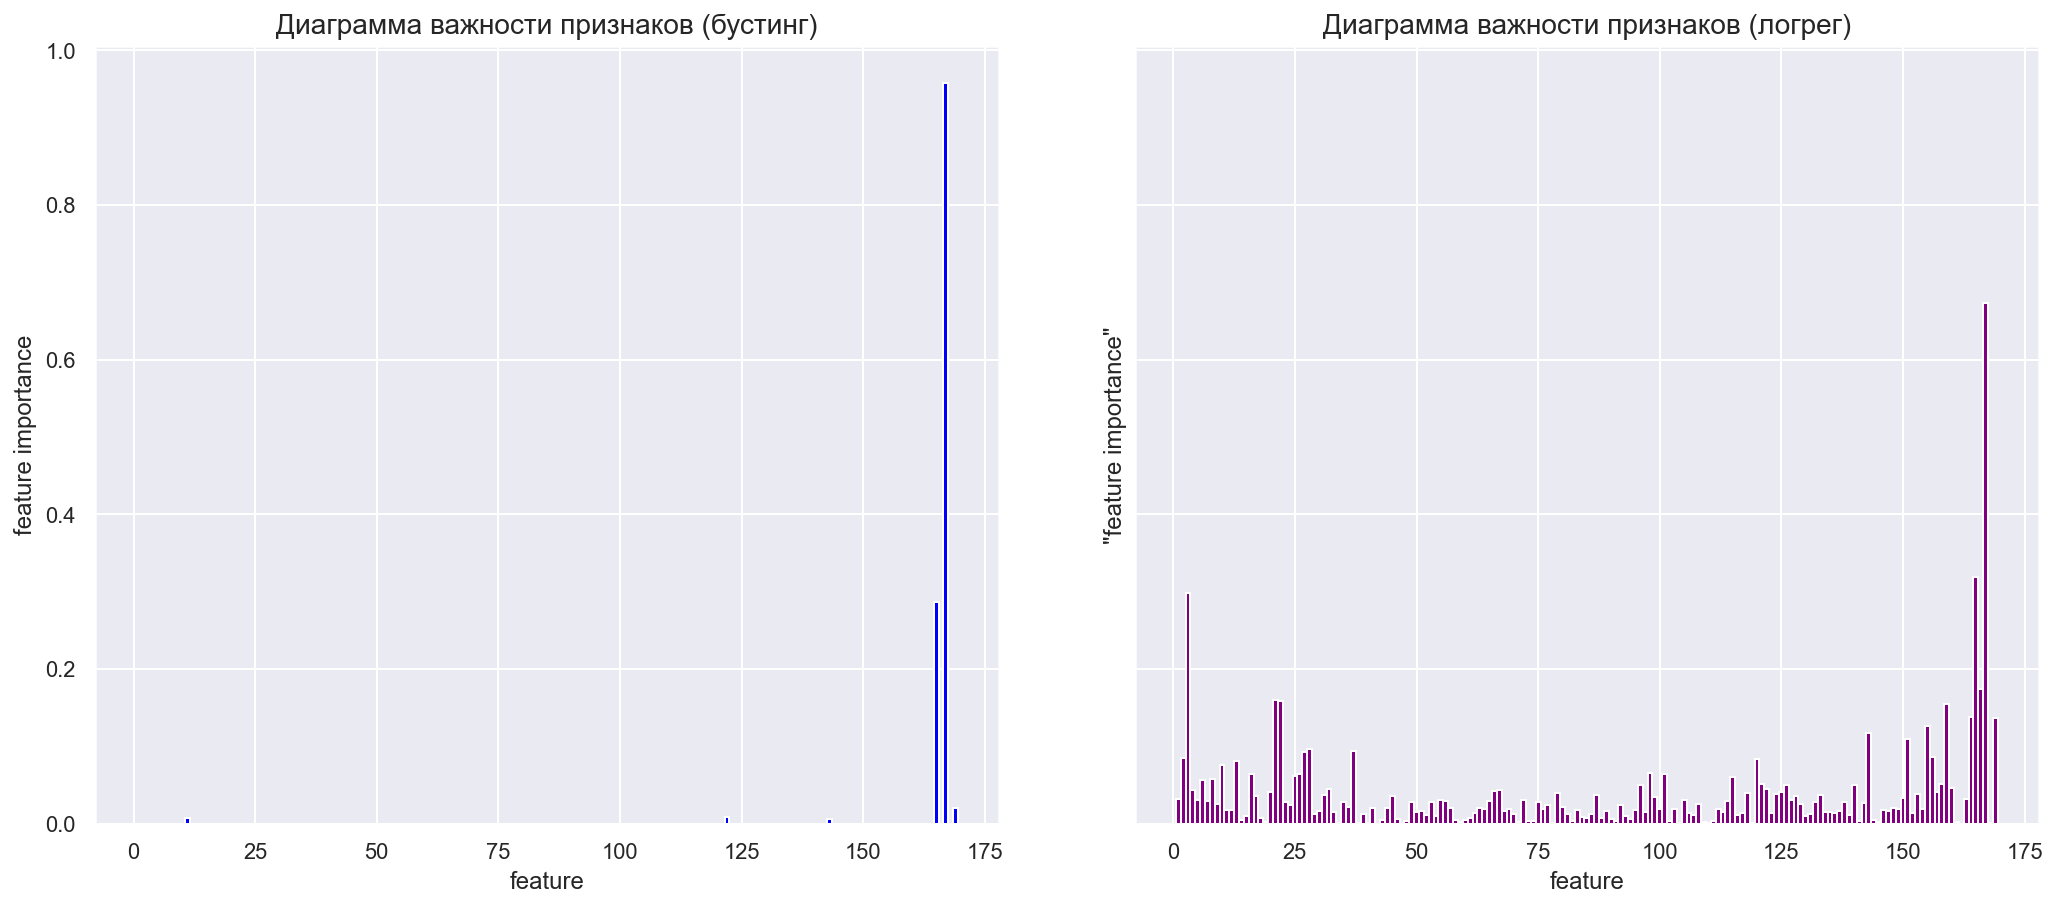

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey='row')
axs[0].bar(list(range(1, len(f_imp_b) + 1)), f_imp_b, width=1, color ='blue')
axs[0].set_xlabel('feature', fontsize=12)
axs[0].set_ylabel('feature importance', fontsize=12)
axs[0].set_title('Диаграмма важности признаков (бустинг)', fontsize=14)

axs[1].bar(list(range(1, len(f_imp_lr) + 1)), f_imp_lr, width=1, color ='purple')
axs[1].set_xlabel('feature', fontsize=12)
axs[1].set_ylabel('"feature importance"', fontsize=12)
axs[1].set_title('Диаграмма важности признаков (логрег)', fontsize=14)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.95,
                    hspace=0.45, wspace=0.15)

Глядя на эти две столбчатые диграммы, можно заметить, что, в принципе, пики расположены в одних и тех же местах (т.е. соответствуют одним и тем же признакам), т.е., видимо, можем сделать вывод, что признаки важные с точки зрения бустинга являются важными и для логрега.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [29]:
boost_feat = Boosting(base_model_param, **param_dict)
boost_feat.fit(x_train[:,155:], y_train, x_valid[:,155:], y_valid)
print(f'Test ROC-AUC {boost_feat.score(x_test[:,155:], y_test):.4f}')

Test ROC-AUC 0.9170


Да, после фильтрации стало лучше, хоть и не особо значительно

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [ ]:
# YOUR CODE:

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?